#### Lesson 6 Deriving New Columns & Defining Python Functions ####
Link to this lesson: https://community.modeanalytics.com/python/tutorial/defining-python-functions/

In [1]:
# Import packages
import pandas as pd
# show plots in the notebook
%matplotlib inline
# default notebook setup
pd.options.display.float_format = '{:3f}'.format # suppresses scientific notation in pandas

In [3]:
# Reads in the csv of Watsi data
data = pd.read_csv('watsi_dataset_demo.csv')
data = data.fillna('') # replace missing values with strings for easier text processing
data.info() # prints out column names, counts and dtypes in the dataframe
# the Watsi web traffic can now be called via the 'data' dataframe object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
referrer           5000 non-null object
timestamp          5000 non-null object
title              5000 non-null object
url                5000 non-null object
user_agent         5000 non-null object
user_id            5000 non-null object
referrer_domain    5000 non-null object
website_section    5000 non-null object
platform           5000 non-null object
dtypes: object(9)
memory usage: 351.6+ KB


In [4]:
data.head()

,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform
0,https://www.google.com/,2016-02-05 00:48:23,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,CHAROLETTE S,google,,Desktop
1,https://themeteorchef.com/snippets/making-use-...,2016-02-24 23:12:10,Watsi | The Meteor Chef,https://watsi.org/team/the-meteor-chef,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,WARREN Q,themeteorchef.com,team,Desktop
2,https://watsi.org/,2015-12-25 17:59:35,Watsi | Give the gift of health with a Watsi G...,https://watsi.org/gift-cards,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,MITCHEL O,watsi.org,gift-cards,Desktop
3,,2016-02-05 21:19:30,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,MICHEL O,,,Desktop
4,https://watsi.org/fund-treatments,2016-02-14 19:30:08,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_2...,ANDREE N,watsi.org,,Desktop


In [5]:
data['platform'].value_counts()

Desktop       3934
iPhone         515
Android        388
iPad           154
Opera Mini       7
IEMobile         1
BlackBerry       1
Name: platform, dtype: int64

In [6]:
data['new'] = 2

In [7]:
data[:3]

,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform,new
0,https://www.google.com/,2016-02-05 00:48:23,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,CHAROLETTE S,google,,Desktop,2
1,https://themeteorchef.com/snippets/making-use-...,2016-02-24 23:12:10,Watsi | The Meteor Chef,https://watsi.org/team/the-meteor-chef,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,WARREN Q,themeteorchef.com,team,Desktop,2
2,https://watsi.org/,2015-12-25 17:59:35,Watsi | Give the gift of health with a Watsi G...,https://watsi.org/gift-cards,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,MITCHEL O,watsi.org,gift-cards,Desktop,2


In [8]:
data['new'] = 'overwritten'
data[:3]

,referrer,timestamp,title,url,user_agent,user_id,referrer_domain,website_section,platform,new
0,https://www.google.com/,2016-02-05 00:48:23,Watsi | Fund medical treatments for people aro...,https://watsi.org/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_4...,CHAROLETTE S,google,,Desktop,overwritten
1,https://themeteorchef.com/snippets/making-use-...,2016-02-24 23:12:10,Watsi | The Meteor Chef,https://watsi.org/team/the-meteor-chef,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,WARREN Q,themeteorchef.com,team,Desktop,overwritten
2,https://watsi.org/,2015-12-25 17:59:35,Watsi | Give the gift of health with a Watsi G...,https://watsi.org/gift-cards,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_1...,MITCHEL O,watsi.org,gift-cards,Desktop,overwritten


In [9]:
mobile = ['iPhone', 'Android', 'iPad', 'Opera Mini', 'IEMobile', 'BlackBerry']

In [10]:
print 'iPad' in mobile
print 'Desktop' in mobile
print 'Monty Python' in mobile

True
False
False


In [11]:
if 'Opera Mini' in mobile:
    print 'great success!'

great success!


In [12]:
if 'The Marriage of Figaro' in mobile:
    print 'great success.'

In [13]:
if 'The Marruage of Figaro' in mobile:
    print 'great success.'
else:
    print 'that is immobile'

that is immobile


In [14]:
operas = ['The Marriage of Figaro', 'The Magic Flute', 'La traviata']

if 'The Marriage of Figaro' in mobile:
    print 'grave success.'
elif 'The Marriage of Figaro' in operas:
    print 'that is a gravely beautiful piece.'
else:
    print 'that is immobile'
    

that is a gravely beautiful piece.


In [15]:
def is_in_mobile(platform): # platform is the parameter
    if platform in mobile:
        print 'great success'

In [16]:
is_in_mobile('BlackBerry') # 'Blackberry is the argument


great success


In [17]:
def is_in_mobile(platform):
    if platform in mobile:
        print 'great success'
    else:
        print ':('

In [18]:
is_in_mobile('SnackBerry')


:(


In [19]:
def filter_desktop_mobile(platform):
    if platform in mobile:
        return 'Mobile'
    elif platform == 'Desktop':
        return 'Desktop'
    else:
        return 'Not Known'

In [20]:
filter_desktop_mobile('Android')

'Mobile'

In [21]:
what_is_android = filter_desktop_mobile('Android')
print what_is_android

Mobile


In [22]:
print filter_desktop_mobile('iPhone')
print filter_desktop_mobile('Desktop')
print filter_desktop_mobile('Paper Plane')

Mobile
Desktop
Not Known


In [23]:
data['platform'].apply(filter_desktop_mobile)

0       Desktop
1       Desktop
2       Desktop
3       Desktop
4       Desktop
5       Desktop
6       Desktop
7       Desktop
8       Desktop
9        Mobile
10       Mobile
11      Desktop
12       Mobile
13      Desktop
14      Desktop
15       Mobile
16       Mobile
17      Desktop
18      Desktop
19      Desktop
20       Mobile
21      Desktop
22      Desktop
23      Desktop
24      Desktop
25      Desktop
26       Mobile
27      Desktop
28      Desktop
29       Mobile
         ...   
4970    Desktop
4971    Desktop
4972    Desktop
4973    Desktop
4974    Desktop
4975    Desktop
4976    Desktop
4977    Desktop
4978    Desktop
4979     Mobile
4980    Desktop
4981     Mobile
4982    Desktop
4983    Desktop
4984    Desktop
4985    Desktop
4986    Desktop
4987    Desktop
4988    Desktop
4989    Desktop
4990    Desktop
4991     Mobile
4992     Mobile
4993    Desktop
4994    Desktop
4995    Desktop
4996    Desktop
4997     Mobile
4998     Mobile
4999    Desktop
Name: platform, dtype: o

In [24]:
data['platform_type'] = data['platform'].apply(filter_desktop_mobile)

In [25]:
data[['platform', 'platform_type']][14:18]

,platform,platform_type
14,Desktop,Desktop
15,Android,Mobile
16,iPhone,Mobile
17,Desktop,Desktop


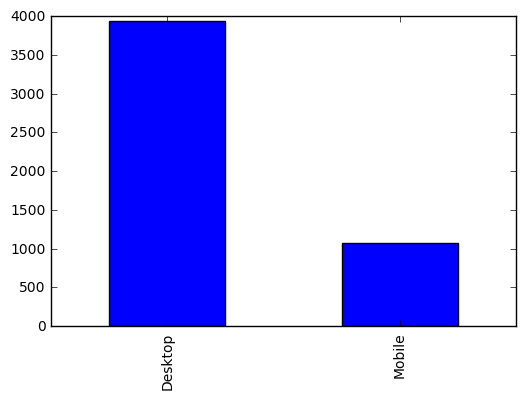

In [26]:
data['platform_type'].value_counts().plot(kind='bar');

In [27]:
def get_referrer_length(referrer):
    return len(referrer)

data['referrer_len'] = data['referrer'].apply(get_referrer_length)

data[['referrer','referrer_len']].head()

,referrer,referrer_len
0,https://www.google.com/,23
1,https://themeteorchef.com/snippets/making-use-...,63
2,https://watsi.org/,18
3,,0
4,https://watsi.org/fund-treatments,33


In [28]:
data['referrer_len'] = data['referrer'].apply(lambda x: len(x)) # one line example using lambda

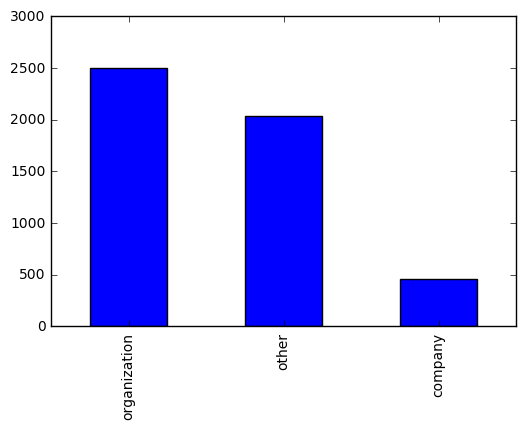

In [29]:
tlds = ['.org', '.com']

def filter_tld(domain):
    if '.org' in domain:
        return 'organization'
    elif '.com' in domain:
        return 'company'
    else:
        return 'other'
    
data['tld'] = data['referrer_domain'].apply(filter_tld)
data['tld'].value_counts().plot(kind='bar');

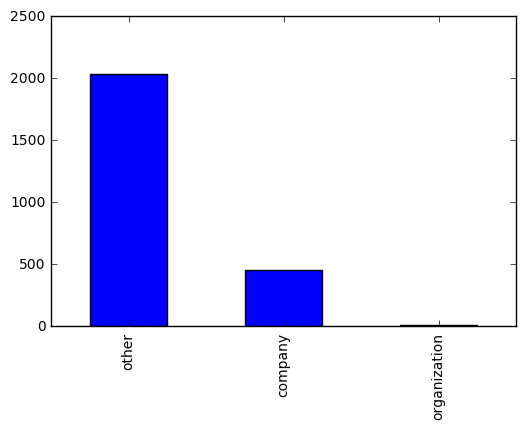

In [30]:
no_watsi = data[data['referrer_domain'] != 'watsi.org']
no_watsi['tld'].value_counts().plot(kind='bar');

In [31]:
data['domain_types'] = data['referrer_domain'].apply(lambda x: 'organization' if '.org' in x else 'company' if '.com' in x else 'other') # one line example using lambda

In [32]:
data[['referrer_domain','domain_types','tld']][10:20]

,referrer_domain,domain_types,tld
10,,other,other
11,facebook.com,company,company
12,watsi.org,organization,organization
13,,other,other
14,watsi.org,organization,organization
15,watsi.org,organization,organization
16,,other,other
17,,other,other
18,t.co,other,other
19,,other,other


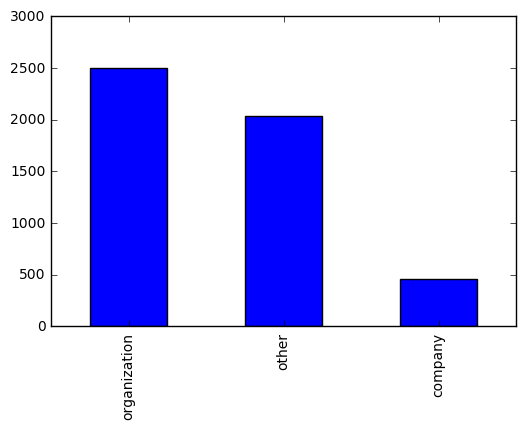

In [33]:
data['domain_types'].value_counts().plot(kind='bar');